In [1]:
import pandas as pd

data_url = "./data/my_data.csv"
data = pd.read_csv(data_url)

data.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,industry,function,fraudulent,Country,len_profile,len_description,Whether_experience_is_required,Whether_education_is_required
0,Marketing,0,1,0,Other,NaN,Marketing,0,US,885,905,True,False
1,etc,0,1,0,Full-time,Marketing and Advertising,Customer Service,0,NZ,1286,2077,True,False
2,etc,0,1,0,NaN,NaN,NaN,0,US,879,355,False,False
3,Sales,0,1,0,Full-time,Computer Software,Sales,0,US,614,2600,True,True
4,etc,0,1,1,Full-time,Hospital & Health Care,Health Care Provider,0,US,1628,1520,True,True


In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=2)
train, val =  train_test_split(train, test_size=len(test), random_state=2)

train.shape, val.shape, test.shape

((10728, 13), (3576, 13), (3576, 13))

In [3]:
target = "fraudulent"
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]


In [4]:

# %%time : 실행 시간 계산해주는 method
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.9759507829977628


In [5]:
# bootstrap sampling으로 추출되지 않은 샘플이 'Out-Of-Bag'샘플이며, 이를 이용해 모델을 검증
pipe.named_steps['randomforestclassifier'].oob_score_

0.9774422073079791

In [6]:
from category_encoders import OrdinalEncoder

# ordinal encoding
pipe_ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe_ord.fit(X_train, y_train)
print('검증 정확도', pipe_ord.score(X_val, y_val))

검증 정확도 0.977069351230425


In [7]:
# Ordinal Encoding의 경우 feature가 늘어나지 않으며
# 각각 Unique한 feature를 숫자(+ 순서)로 구분한다.

print('Shape  before: ', X_train.shape)

# OneHotEncoder
enc = pipe.named_steps['onehotencoder']
encoded = enc.transform(X_train)
print('OneHot  shape: ', encoded.shape)

# OrdinalEncoder
enc = pipe_ord.named_steps['ordinalencoder']
encoded = enc.transform(X_train)
print('Ordinal shape: ', encoded.shape)

Shape  before:  (10728, 12)
OneHot  shape:  (10728, 203)
Ordinal shape:  (10728, 12)


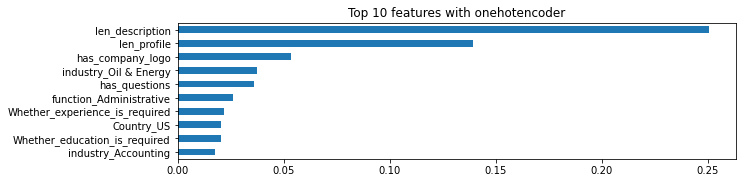

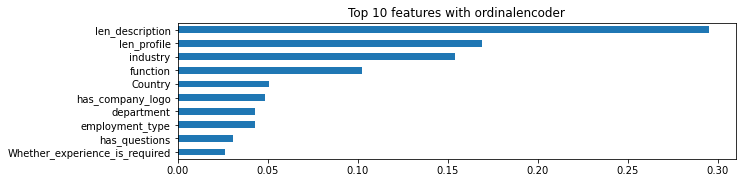

In [8]:
import matplotlib.pyplot as plt

# 특성 중요도(onehot)
rf = pipe.named_steps['randomforestclassifier']
colnames = pipe.named_steps['onehotencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with onehotencoder')
importances.sort_values()[-n:].plot.barh();


# 특성 중요도(ordinal)
rf_ord = pipe_ord.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();

In [9]:
data.describe()

,telecommuting,has_company_logo,has_questions,fraudulent,len_profile,len_description
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434,620.901454,1218.004418
std,0.202631,0.403492,0.499945,0.214688,567.454100,894.828620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,138.000000,607.000000
50%,0.000000,1.000000,0.000000,0.000000,570.000000,1017.000000
75%,0.000000,1.000000,1.000000,0.000000,879.000000,1586.000000
max,1.000000,1.000000,1.000000,1.000000,6178.000000,14907.000000
